# 02 Производство сетей
### PALESTINE QUESTION
Производство сетей на основе манипуляции с общей таблицей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure

## 1. Читаем общую таблицу по голосованиям с диска

In [2]:
votes_table_com = pd.read_csv('votes_table.csv')
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
5,2022-11-30,A/RES/77/22,Committee on the Exercise of the Inalienable R...,https://digitallibrary.un.org/record/3996096,"['Palestine, Israel', 'war']",PALESTINE QUESTION
6,2022-11-30,A/RES/77/23,Division for Palestinian Rights of the Secreta...,https://digitallibrary.un.org/record/3996095,"['Palestine, Israel', 'war']",PALESTINE QUESTION
7,2022-11-30,A/RES/77/25,Peaceful settlement of the question of Palesti...,https://digitallibrary.un.org/record/3996093,"['Palestine, Israel', 'war']",PALESTINE QUESTION
8,2022-11-30,A/RES/77/24,Special information programme on the question ...,https://digitallibrary.un.org/record/3996092,"['Palestine, Israel', 'war']",PALESTINE QUESTION
9,2022-12-15,A/RES/77/228,Situation of human rights in the Islamic Repub...,https://digitallibrary.un.org/record/3997720,['Iran'],HUMAN RIGHTS--REPORTS


## 2. Data processing

In [333]:
#votes_table_com['Tags'] = list(votes_table_com['Tags'].apply(lambda x: x[1:-1]))
#votes_table_com

In [329]:
#votes_table_com.to_csv('votes_table.csv', index=False) 
#votes_table_com.drop([9], inplace=True)

In [3]:
topic = 'PALESTINE QUESTION'
votes_table_com = votes_table_com[votes_table_com['Topic'] == topic]

In [4]:
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
5,2022-11-30,A/RES/77/22,Committee on the Exercise of the Inalienable R...,https://digitallibrary.un.org/record/3996096,"['Palestine, Israel', 'war']",PALESTINE QUESTION
6,2022-11-30,A/RES/77/23,Division for Palestinian Rights of the Secreta...,https://digitallibrary.un.org/record/3996095,"['Palestine, Israel', 'war']",PALESTINE QUESTION
7,2022-11-30,A/RES/77/25,Peaceful settlement of the question of Palesti...,https://digitallibrary.un.org/record/3996093,"['Palestine, Israel', 'war']",PALESTINE QUESTION
8,2022-11-30,A/RES/77/24,Special information programme on the question ...,https://digitallibrary.un.org/record/3996092,"['Palestine, Israel', 'war']",PALESTINE QUESTION


## 3. Net making

###  3.1 Создание сводной таблицамы голосований

In [5]:
vote_array = [] # массив из таблиц голосований, полученных из файлов

votes_table_com['Resolution'].apply(
    lambda x: vote_array.append(
        pd.read_csv('resolution_vote/' + x.replace('/', '_') + '.csv', index_col = 'Country')
    )
)

5    None
6    None
7    None
8    None
Name: Resolution, dtype: object

In [6]:
len(vote_array)

4

In [7]:
vote_array[0]

,A/RES/77/22
Country,
AFGHANISTAN,NaN
ALBANIA,-1.0
ALGERIA,1.0
ANDORRA,0.0
ANGOLA,1.0
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN
VIET NAM,1.0
YEMEN,1.0


In [8]:
# Merge table

common_table = vote_array[0]

for index in range(1, len(vote_array)):
    common_table = pd.merge(common_table, vote_array[index], how='outer', left_index=True, right_index=True) 

In [9]:
common_table

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
AFGHANISTAN,NaN,NaN,NaN,NaN
ALBANIA,-1.0,-1.0,1.0,1.0
ALGERIA,1.0,1.0,1.0,1.0
ANDORRA,0.0,0.0,1.0,1.0
ANGOLA,1.0,1.0,1.0,1.0
...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN
VIET NAM,1.0,1.0,1.0,1.0
YEMEN,1.0,1.0,1.0,1.0


####  Убираем строчки со всеми NaN

In [105]:
pd.concat([
    common_table.loc[['UNITED STATES']],
    common_table.loc[['CZECHIA']],
    common_table.loc[['ALBANIA']],
    common_table.loc[['ITALY']], 
    common_table.loc[['CAMEROON']], 
    common_table.loc[['BELGIUM']], 
    common_table.loc[['RUSSIAN FEDERATION']], 
    common_table.loc[['INDIA']], 
    common_table.loc[['CHINA']]
])

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
UNITED STATES,-1.0,-1.0,-1.0,-1.0
CZECHIA,-1.0,-1.0,0.0,-1.0
ALBANIA,-1.0,-1.0,1.0,1.0
ITALY,0.0,-1.0,1.0,1.0
CAMEROON,0.0,0.0,0.0,0.0
BELGIUM,0.0,0.0,1.0,1.0
RUSSIAN FEDERATION,0.0,0.0,1.0,1.0
INDIA,1.0,0.0,1.0,1.0
CHINA,1.0,1.0,1.0,1.0


In [256]:
#common_table.dropna(how='all', inplace = True, axis=0)

In [243]:
#common_table.dropna(inplace = True)

In [12]:
#common_table

In [13]:
#len(common_table.index)

In [14]:
#if 'UKRAINE' in common_table.index: print('True') 


In [10]:
# находим лигнюю страну
set(common_table.index).difference(vote_array[0].index)

set()

### 3.2 Убираем разное написание Турции и "CÔTE D'IVOIRE"

In [11]:
common_table[common_table.index == 'TURKEY']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,


In [21]:
common_table[common_table.index == 'TURKIYE']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,


In [22]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
TÜRKIYE,1.0,1.0,1.0,1.0


In [20]:
common_table.loc['TÜRKIYE'] =  common_table.loc["TURKIYE"]
common_table.drop(['TURKIYE'], inplace = True)

In [23]:
common_table[common_table.index == "CÔTE D'IVOIRE"]

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,


In [24]:
common_table[common_table.index == "COTE D'IVOIRE"]

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
COTE D'IVOIRE,1.0,0.0,1.0,1.0


In [25]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
TÜRKIYE,1.0,1.0,1.0,1.0


In [26]:
common_table.loc["CÔTE D'IVOIRE"] = common_table.loc[["COTE D'IVOIRE"], list(common_table.columns)].sum()
common_table.drop(["COTE D'IVOIRE"], inplace = True)

common_table[common_table.index == "CÔTE D'IVOIRE"]

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
CÔTE D'IVOIRE,1.0,0.0,1.0,1.0


In [29]:
common_table.to_csv(topic + '_vote_table.csv', index=True) 

In [31]:
pd.read_csv(topic + '_vote_table.csv')

,Country,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
0,AFGHANISTAN,NaN,NaN,NaN,NaN
1,ALBANIA,-1.0,-1.0,1.0,1.0
2,ALGERIA,1.0,1.0,1.0,1.0
3,ANDORRA,0.0,0.0,1.0,1.0
4,ANGOLA,1.0,1.0,1.0,1.0
...,...,...,...,...,...
188,YEMEN,1.0,1.0,1.0,1.0
189,ZAMBIA,1.0,1.0,1.0,1.0
190,ZIMBABWE,1.0,1.0,1.0,1.0
191,TÜRKIYE,1.0,1.0,1.0,1.0


###  3.2 Вычисление показателя солидарности для каждого голосования

In [43]:
# принимает таблицу с рещультатами голосования common_table
# возвращает два массива c парной узлов (ребром)

def get_edges(table):
    nodes_1 = []
    nodes_2 = []
    count_index = len(common_table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):

            nodes_1.append(table.index[index_first])
            nodes_2.append(table.index[index_second])
        
    return [nodes_1, nodes_2]

# принимает таблицу с результатами голосования из common_table и название расчетного столбца голосования 
# возвращает массив оценки солидарности шголосования solid_val

def get_solid_val(table, item):
    solid_val = []
    count_index = len(table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):
            
            # сравнение индексов голосования
            if (pd.isnull(table.iloc[index_first][item]) or pd.isnull(table.iloc[index_second][item])): 
                solid_val.append(np.nan) 
            else: 
                # Это значит, что если оба воздержались, то 0 == 0 это True
                solid_val.append(table.iloc[index_first][item] == table.iloc[index_second][item])
                # Нужно ли давать 1 если 1 == 1, -1 если -1 == -1... как быть с 0?
            
    return solid_val

In [44]:
#
# ЗАГРУЗНЫЙ ПРЦЕСС !!!!!
#
# создаем таблицу ребер сети

net_table = pd.DataFrame()

# создаем все ребра сети
nodes_arr = get_edges(common_table)
net_table['Nodes_1'] = nodes_arr[0]
net_table['Nodes_2'] = nodes_arr[1]

# заполняем результаты голосований
for item in common_table.columns: 
    net_table[item] = get_solid_val(common_table, item)

net_table

,Nodes_1,Nodes_2,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
0,AFGHANISTAN,ALBANIA,NaN,NaN,NaN,NaN
1,AFGHANISTAN,ALGERIA,NaN,NaN,NaN,NaN
2,AFGHANISTAN,ANDORRA,NaN,NaN,NaN,NaN
3,AFGHANISTAN,ANGOLA,NaN,NaN,NaN,NaN
4,AFGHANISTAN,ANTIGUA AND BARBUDA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
18523,ZAMBIA,TÜRKIYE,True,True,True,True
18524,ZAMBIA,CÔTE D'IVOIRE,True,False,True,True
18525,ZIMBABWE,TÜRKIYE,True,True,True,True
18526,ZIMBABWE,CÔTE D'IVOIRE,True,False,True,True


In [44]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table[((net_table['Nodes_1'] == 'THAILAND') & (net_table['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]

#RUSSIAN FEDERATION


### 3.3 Вычисление коэффициента солидарности (веса) для каждого из ребер

`Solid_val` коэффициент солидарности (вес ребер)

In [45]:
#net_table_weight = net_table.replace({True: 1, False: -1})
net_table_weight = net_table.replace({True: 1, False: 0})

#net_table_weight = net_table

net_table_weight['Solid_val'] = abs(net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1))
#net_table_weight['Solid_val'] = net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1)


net_table_weight.drop(list(net_table_weight.columns)[2:-1], inplace=True, axis=1)

#net_table_weight = net_table_weight[net_table_weight.Solid_val != 0]
# выбираем все значения больще n
net_table_weight = net_table_weight[net_table_weight.Solid_val >=1]

net_table_weight

,Nodes_1,Nodes_2,Solid_val
192,ALBANIA,ALGERIA,2.0
193,ALBANIA,ANDORRA,2.0
194,ALBANIA,ANGOLA,2.0
196,ALBANIA,ARGENTINA,2.0
197,ALBANIA,ARMENIA,2.0
...,...,...,...
18523,ZAMBIA,TÜRKIYE,4.0
18524,ZAMBIA,CÔTE D'IVOIRE,3.0
18525,ZIMBABWE,TÜRKIYE,4.0
18526,ZIMBABWE,CÔTE D'IVOIRE,3.0


In [266]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table_weight[((net_table_weight['Nodes_1'] == 'AFGHANISTAN') & (net_table_weight['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]


####  Немного статистики

In [46]:
set(net_table_weight['Solid_val'].isna())

{False}

In [47]:
len(net_table_weight)

12849

In [295]:
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 5])

In [48]:
len(net_table_weight['Solid_val'])
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 0])

12849

(array([1265.,    0.,    0.,    0.,    0.,    0., 5290.,    0.,    0.,
           0.,    0.,    0., 2068.,    0.,    0.,    0.,    0., 4226.]),
 array([1.        , 1.16666667, 1.33333333, 1.5       , 1.66666667,
        1.83333333, 2.        , 2.16666667, 2.33333333, 2.5       ,
        2.66666667, 2.83333333, 3.        , 3.16666667, 3.33333333,
        3.5       , 3.66666667, 3.83333333, 4.        ]),
 <BarContainer object of 18 artists>)

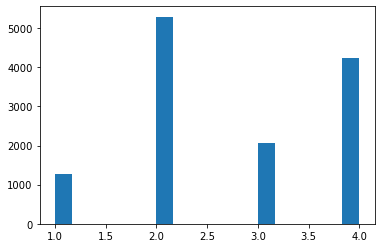

In [297]:
plt.hist(net_table_weight['Solid_val'], bins=18)

### 3.3 Строим сеть 

In [64]:
G = nx.Graph()
G.add_nodes_from(list(common_table.index))
net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

192      None
193      None
194      None
196      None
197      None
         ... 
18523    None
18524    None
18525    None
18526    None
18527    None
Length: 12849, dtype: object

In [65]:
len(G.nodes())

193

In [66]:
G.edges()

EdgeView([('ALBANIA', 'ALGERIA'), ('ALBANIA', 'ANDORRA'), ('ALBANIA', 'ANGOLA'), ('ALBANIA', 'ARGENTINA'), ('ALBANIA', 'ARMENIA'), ('ALBANIA', 'AUSTRALIA'), ('ALBANIA', 'AUSTRIA'), ('ALBANIA', 'AZERBAIJAN'), ('ALBANIA', 'BAHRAIN'), ('ALBANIA', 'BANGLADESH'), ('ALBANIA', 'BARBADOS'), ('ALBANIA', 'BELARUS'), ('ALBANIA', 'BELGIUM'), ('ALBANIA', 'BELIZE'), ('ALBANIA', 'BENIN'), ('ALBANIA', 'BHUTAN'), ('ALBANIA', 'BOLIVIA (PLURINATIONAL STATE OF)'), ('ALBANIA', 'BOSNIA AND HERZEGOVINA'), ('ALBANIA', 'BOTSWANA'), ('ALBANIA', 'BRAZIL'), ('ALBANIA', 'BRUNEI DARUSSALAM'), ('ALBANIA', 'BULGARIA'), ('ALBANIA', 'BURKINA FASO'), ('ALBANIA', 'CABO VERDE'), ('ALBANIA', 'CAMBODIA'), ('ALBANIA', 'CANADA'), ('ALBANIA', 'CENTRAL AFRICAN REPUBLIC'), ('ALBANIA', 'CHAD'), ('ALBANIA', 'CHILE'), ('ALBANIA', 'CHINA'), ('ALBANIA', 'COLOMBIA'), ('ALBANIA', 'COMOROS'), ('ALBANIA', 'COSTA RICA'), ('ALBANIA', 'CROATIA'), ('ALBANIA', 'CUBA'), ('ALBANIA', 'CYPRUS'), ('ALBANIA', 'CZECHIA'), ('ALBANIA', "DEMOCRATIC PEO

In [51]:
nx.is_connected(G)

False

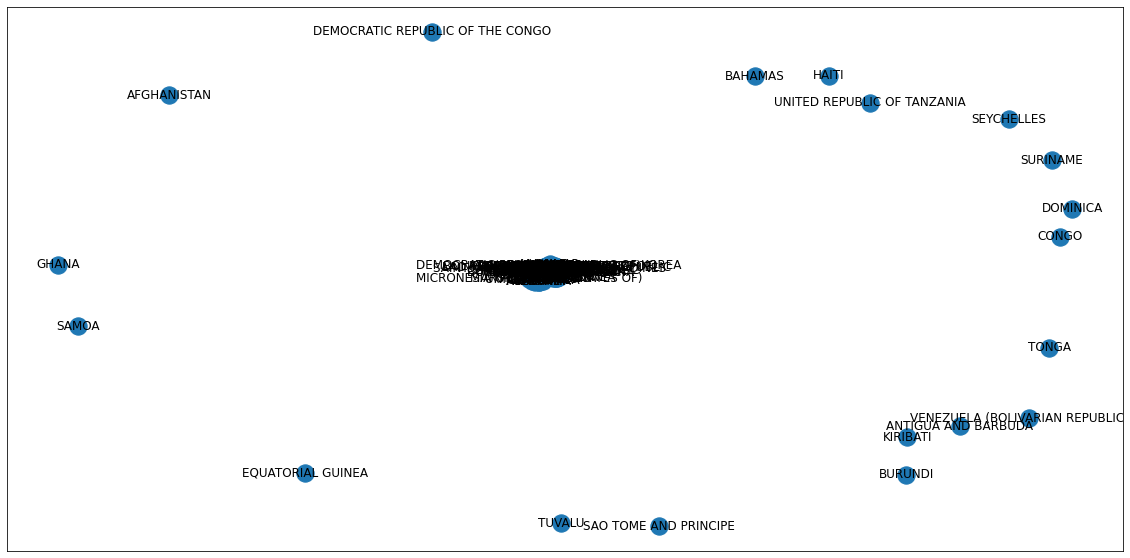

In [67]:
figure(figsize=(20, 10))
nx.draw_networkx(G)

In [68]:
print(len(sorted(nx.connected_components(G))))
print(len(G.nodes()))

20
193


In [54]:
print(round(nx.average_clustering(G), 2))
print(round(nx.transitivity(G), 2))

0.87
0.97


In [55]:
#country_name = 'TURKIYE'
country_name = 'RUSSIAN FEDERATION'
#country_name = 'UNITED STATES'
country_name = 'ISRAEL'
#UNITED STATES OF AMERICA

for index in range (0, len(list(nx.connected_components(G)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(G))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(G))[index]
    print(country_arr_test)
    print('______________')





0
False

{'AFGHANISTAN'}
______________

1
True

{'CROATIA', 'MOROCCO', 'MALDIVES', 'AZERBAIJAN', 'EL SALVADOR', 'CHINA', 'LATVIA', 'JORDAN', 'NEW ZEALAND', 'FINLAND', 'LIBYA', 'TUNISIA', 'URUGUAY', 'PANAMA', 'TAJIKISTAN', 'DOMINICAN REPUBLIC', 'GABON', 'KENYA', 'NORWAY', 'IRELAND', 'MONTENEGRO', 'PAPUA NEW GUINEA', 'ESTONIA', 'SAN MARINO', 'CHAD', 'MADAGASCAR', 'ANDORRA', 'ESWATINI', 'LESOTHO', 'NAMIBIA', 'PALAU', 'TRINIDAD AND TOBAGO', 'MONACO', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'GAMBIA', 'PORTUGAL', 'NORTH MACEDONIA', 'AUSTRALIA', 'EGYPT', 'PARAGUAY', 'POLAND', 'ZIMBABWE', 'LITHUANIA', 'ARGENTINA', 'NAURU', 'BOTSWANA', 'TÜRKIYE', 'UNITED STATES', 'OMAN', "CÔTE D'IVOIRE", 'TIMOR-LESTE', 'FIJI', 'CAMBODIA', 'FRANCE', 'ICELAND', 'SWEDEN', 'SOUTH SUDAN', 'NIGER', 'SRI LANKA', 'BANGLADESH', 'UNITED ARAB EMIRATES', 'SAINT VINCENT AND THE GRENADINES', 'RWANDA', 'MALI', 'COSTA RICA', 'LIBERIA', 'SLOVENIA', 'LEBANON', 'PAKISTAN', 'THAILAND', 'GREECE', 'HUNGARY', 'ALGERIA', 'COMOROS',

### 3.4  Профили голосования по теме:

In [69]:
# Ищем по первой букве
#common_table[common_table.index == 'AZERBAIJAN']
#common_table[common_table.index == 'TURKMENISTAN']
#common_table[common_table.index == 'VENEZUELA (BOLIVARIAN REPUBLIC OF)']
common_table[common_table.index == 'BURKINA FASO']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
BURKINA FASO,1.0,1.0,1.0,1.0


In [70]:
common_table[common_table.index == 'AFGHANISTAN']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
AFGHANISTAN,NaN,NaN,NaN,NaN


In [71]:
common_table[common_table.index == 'NEPAL']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
NEPAL,1.0,1.0,1.0,1.0


In [72]:
common_table[common_table.index == 'RUSSIAN FEDERATION']

,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
Country,,,,
RUSSIAN FEDERATION,0.0,0.0,1.0,1.0


In [73]:
net_table[((net_table['Nodes_1'] == 'LESOTHO') & (net_table['Nodes_2'] == 'THAILAND'))]

,Nodes_1,Nodes_2,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
13751,LESOTHO,THAILAND,True,True,True,True


In [74]:
net_table[net_table['Nodes_1'] == 'LESOTHO']

,Nodes_1,Nodes_2,A/RES/77/22,A/RES/77/23,A/RES/77/25,A/RES/77/24
13677,LESOTHO,LIBERIA,False,False,False,False
13678,LESOTHO,LIBYA,True,True,True,True
13679,LESOTHO,LIECHTENSTEIN,False,False,True,True
13680,LESOTHO,LITHUANIA,False,False,True,True
13681,LESOTHO,LUXEMBOURG,False,False,True,True
...,...,...,...,...,...,...
13770,LESOTHO,YEMEN,True,True,True,True
13771,LESOTHO,ZAMBIA,True,True,True,True
13772,LESOTHO,ZIMBABWE,True,True,True,True
13773,LESOTHO,TÜRKIYE,True,True,True,True


### 3.5 Строим сеть с разными весами

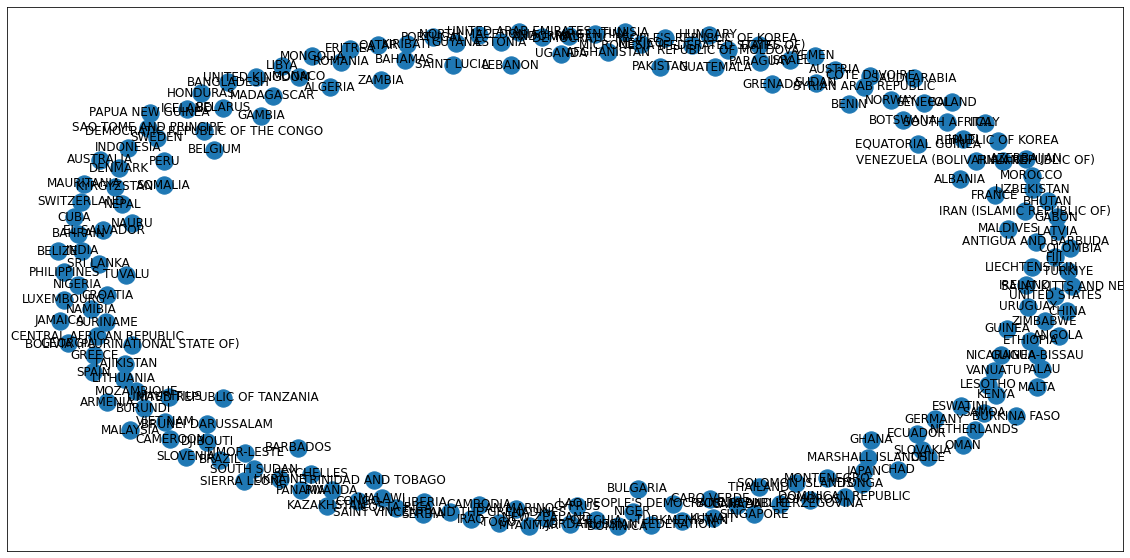

In [75]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 6
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [76]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

193
193


#### Связи -- единогласное голосования по всем резолюциям:

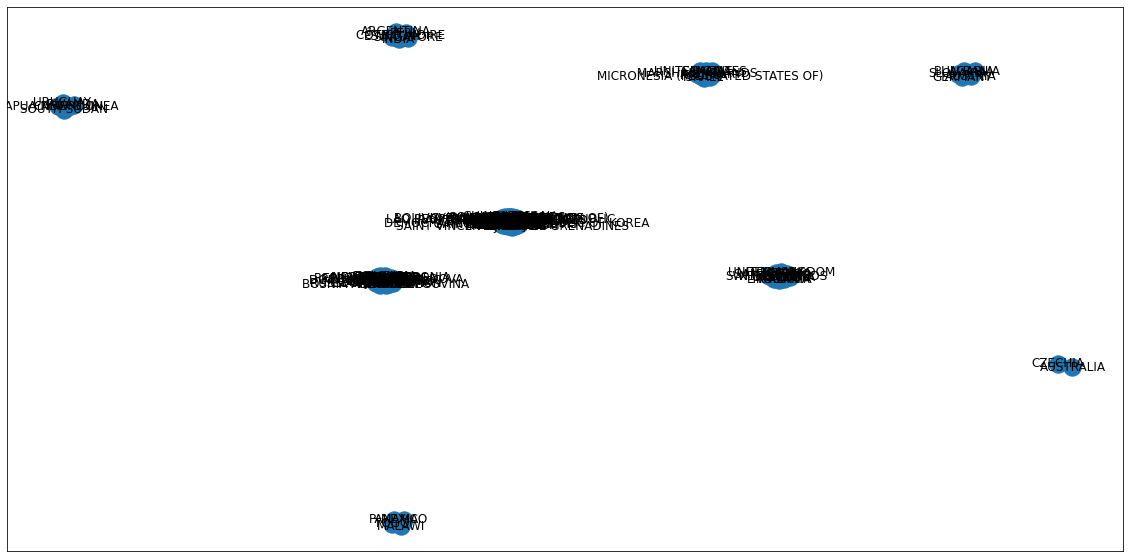

In [77]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 4
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F45 = nx.Graph() 
F45.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F45, seed=0)

for edge in F45.edges(data='weight'):
    nx.draw_networkx_edges(F45, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F45, pos) 

In [78]:
print(len(sorted(nx.connected_components(F45))))
print(len(F45.nodes()))

9
158


In [79]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F45)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F45))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F45))[index]
    print(country_arr_test)
    print('______________')


0
False

{'BULGARIA', 'GERMANY', 'SLOVAKIA', 'ALBANIA', 'AUSTRIA'}
______________

1
False

{'MOROCCO', 'MALDIVES', 'AZERBAIJAN', 'EL SALVADOR', 'CHINA', 'JORDAN', 'LIBYA', 'TUNISIA', 'TAJIKISTAN', 'GABON', 'KENYA', 'CHAD', 'LESOTHO', 'NAMIBIA', 'TRINIDAD AND TOBAGO', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'GAMBIA', 'EGYPT', 'ZIMBABWE', 'BOTSWANA', 'TÜRKIYE', 'OMAN', 'FIJI', 'CAMBODIA', 'NIGER', 'SRI LANKA', 'BANGLADESH', 'UNITED ARAB EMIRATES', 'SAINT VINCENT AND THE GRENADINES', 'MALI', 'LEBANON', 'PAKISTAN', 'THAILAND', 'ALGERIA', 'COMOROS', 'GUINEA', 'QATAR', 'CABO VERDE', 'ECUADOR', 'BRUNEI DARUSSALAM', 'ZAMBIA', 'PHILIPPINES', 'INDONESIA', 'MALTA', 'BARBADOS', 'BENIN', 'TURKMENISTAN', 'BHUTAN', 'NICARAGUA', 'MOZAMBIQUE', 'BELIZE', 'SENEGAL', 'MAURITIUS', 'GUYANA', 'UGANDA', 'BAHRAIN', 'KUWAIT', 'GUINEA-BISSAU', 'UZBEKISTAN', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'IRAQ', 'BURKINA FASO', 'YEMEN', 'SAINT KITTS AND NEVIS', 'SUDAN', 'MALAYSIA', 'NEPAL', 'VIET NAM', 'SAUDI ARABIA', 'C

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более двух раз воздержался или один раз проголосовал против

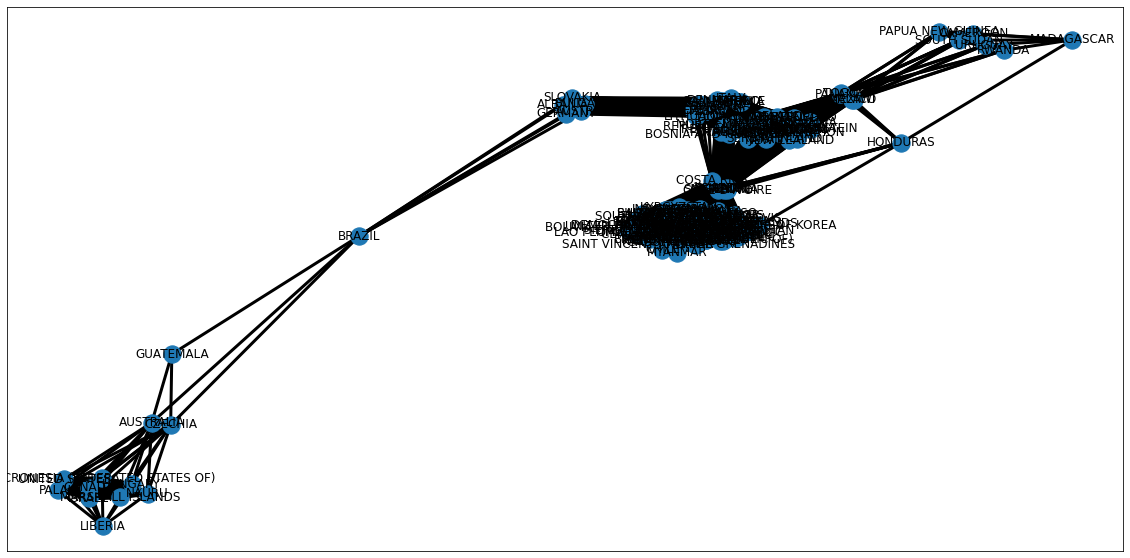

In [80]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 3
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F345 = nx.Graph() 
F345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F345, seed=0)

for edge in F345.edges(data='weight'):
    nx.draw_networkx_edges(F345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F345, pos) 

In [81]:
print(len(sorted(nx.connected_components(F345))))
print(len(F345.nodes()))

1
171


In [306]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F345)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F345))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F345))[index]
    print(country_arr_test)
    print('______________')


0
True

{'QATAR', 'SRI LANKA', 'EL SALVADOR', 'GERMANY', 'HONDURAS', 'ARMENIA', 'JAPAN', 'NEW ZEALAND', 'TURKMENISTAN', 'BURKINA FASO', 'COLOMBIA', 'NEPAL', 'POLAND', 'CENTRAL AFRICAN REPUBLIC', 'SYRIAN ARAB REPUBLIC', 'ARGENTINA', 'UNITED KINGDOM', 'SAN MARINO', 'COSTA RICA', 'SWITZERLAND', 'TURKIYE', 'LIBYA', "COTE D'IVOIRE", 'ECUADOR', 'MICRONESIA (FEDERATED STATES OF)', 'GEORGIA', 'PAKISTAN', 'VANUATU', 'MOZAMBIQUE', 'ROMANIA', 'SAUDI ARABIA', 'BRAZIL', 'INDONESIA', 'SAINT KITTS AND NEVIS', 'NORWAY', 'MALI', 'NIGERIA', 'ANDORRA', 'MALAYSIA', 'SLOVENIA', 'CHAD', 'SOUTH SUDAN', 'MAURITANIA', 'BULGARIA', 'LUXEMBOURG', 'PALAU', 'MALDIVES', 'MARSHALL ISLANDS', 'ZAMBIA', 'GUINEA-BISSAU', 'BOTSWANA', 'SOUTH AFRICA', 'CYPRUS', 'AZERBAIJAN', 'ITALY', 'COMOROS', 'GRENADA', 'GAMBIA', 'PHILIPPINES', 'CAMEROON', 'ALGERIA', 'SAINT LUCIA', 'SINGAPORE', 'CHINA', 'LATVIA', 'CZECHIA', 'RWANDA', 'YEMEN', 'ICELAND', 'BARBADOS', 'GABON', 'ALBANIA', 'ISRAEL', 'BENIN', 'UGANDA', 'GUINEA', 'GUATEMALA', '

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более трех раз воздержался или ...

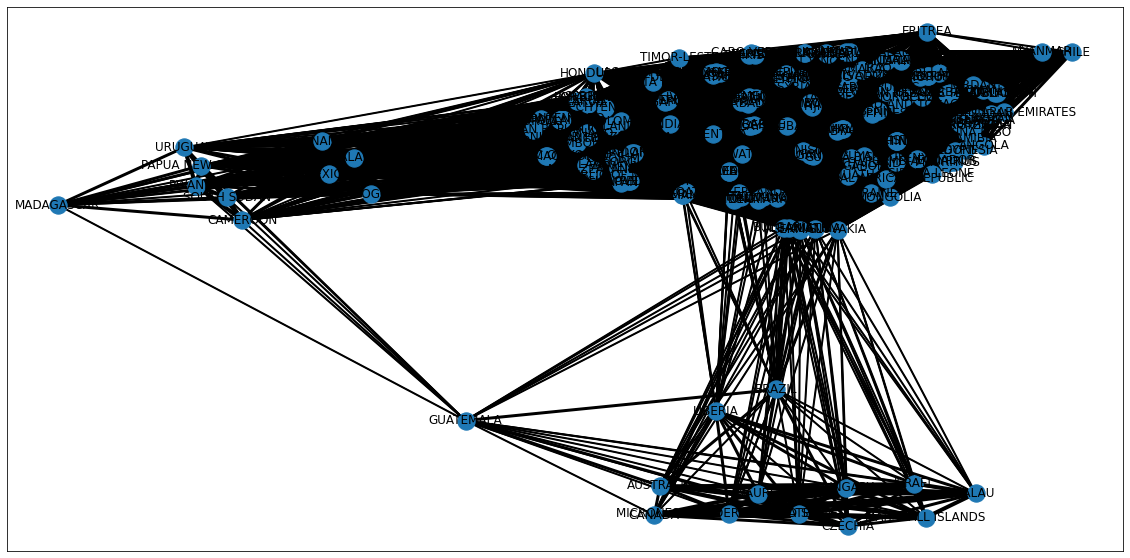

In [307]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 2
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F2345 = nx.Graph() 
F2345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F2345, seed=0)

for edge in F2345.edges(data='weight'):
    nx.draw_networkx_edges(F2345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F2345, pos) 

In [308]:
print(len(sorted(nx.connected_components(F2345))))
print(len(F2345.nodes()))

1
173


In [309]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F2345)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F2345))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F2345))[index]
    print(country_arr_test)
    print('______________')


0
True

{'QATAR', 'SRI LANKA', 'EL SALVADOR', 'GERMANY', 'HONDURAS', 'ARMENIA', 'JAPAN', 'NEW ZEALAND', 'TURKMENISTAN', 'BURKINA FASO', 'COLOMBIA', 'NEPAL', 'POLAND', 'CENTRAL AFRICAN REPUBLIC', 'SYRIAN ARAB REPUBLIC', 'ARGENTINA', 'UNITED KINGDOM', 'SAN MARINO', 'COSTA RICA', 'SWITZERLAND', 'TURKIYE', 'LIBYA', "COTE D'IVOIRE", 'ECUADOR', 'MICRONESIA (FEDERATED STATES OF)', 'GEORGIA', 'PAKISTAN', 'VANUATU', 'MOZAMBIQUE', 'ROMANIA', 'BRAZIL', 'INDONESIA', 'SAINT KITTS AND NEVIS', 'SAUDI ARABIA', 'NIGERIA', 'MALI', 'NORWAY', 'ANDORRA', 'MALAYSIA', 'SLOVENIA', 'CHAD', 'SOUTH SUDAN', 'MAURITANIA', 'BULGARIA', 'LUXEMBOURG', 'PALAU', 'MALDIVES', 'MARSHALL ISLANDS', 'ZAMBIA', 'GUINEA-BISSAU', 'BOTSWANA', 'SOUTH AFRICA', 'CYPRUS', 'AZERBAIJAN', 'ITALY', 'COMOROS', 'GRENADA', 'GAMBIA', 'PHILIPPINES', 'CAMEROON', 'ALGERIA', 'SAINT LUCIA', 'SINGAPORE', 'CHINA', 'LATVIA', 'CZECHIA', 'RWANDA', 'YEMEN', 'ICELAND', 'BARBADOS', 'GABON', 'ALBANIA', 'ISRAEL', 'BENIN', 'UGANDA', 'GUINEA', 'GUATEMALA', '

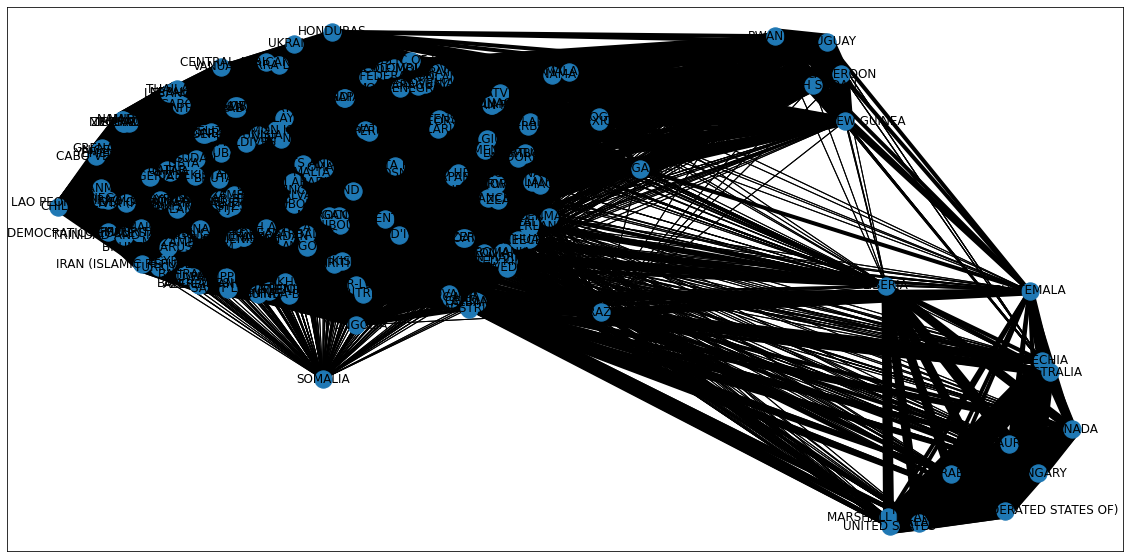

In [310]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 1
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F12345 = nx.Graph() 
F12345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F12345, seed=0)

for edge in F12345.edges(data='weight'):
    nx.draw_networkx_edges(F12345, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F12345, pos) 

In [311]:
print(len(sorted(nx.connected_components(F12345))))
print(len(F12345.nodes()))

1
174


### 5. Экспорт в Gephi

In [83]:
nx.write_gexf(G, "UN_{}.gexf".format(topic.replace(' ', '_')))

In [82]:
"UN_{}.gexf".format(topic.replace(' ', '_'))

'UN_PALESTINE_QUESTION.gexf'